1. Sommario dei dati utilizzati

a. Breve descrizione di ciascun titolo selezionato e motivazione della scelta

Settori: automobili, tecnologia e medicina

notizie che ritengo rilevanti al fine di generare una crescita di interesse verso l'azienda "nome_azienda":

nome_azienda = "TESLA"
1. Partorisce in una Tesla mentre l'autopilot la porta in ospedale
link notizia: https://www.corriere.it/motori/news/nuova-mobilita/21_dicembre_21/partorisce-traffico-una-tesla-l-autopilot-impostato-l-ospedale-97648fd6-6239-11ec-a583-0974d17fd3de.shtml

2. Nuovamente premiata la sicurezza Tesla: pieni voti ai crash test della model Y 2022
link notizia: https://www.automoto.it/elettrico/nuovamente-premiata-la-sicurezza-tesla-pieni-voti-ai-crash-test-della-model-y-2022-video.html


nome_azienda = "NIO":
1. NIO, la nuova ET5 minaccia Tesla Model 3? secondo i media locali, il nuovo veicolo ha fatto registrare un livello record di pre-ordini
https://it.investing.com/news/stock-market-news/nio-la-nuova-et5-minaccia-tesla-model-3-2032890


nome_azienda = "META PLATFORMS"
1. L'annuncio della posizione/mission che Facebook vuole adottare nel futuro verso il metaverso ha suscitato un enorme interesse verso di essa. Soprattutto la nascita di esperienze legate al metaverso e al mondo NFT come The Sandbox e la partecipazione in quest'ultimo da parte di grandi aziende fa capire la direzione che assuemerà la tecnologia e l'economia del futuro. Più che futuro è un cambiamento che sta avvenendo già adesso.
link presentazione meta: https://www.youtube.com/watch?v=Uvufun6xer8&t=4086s
link the sandbox: https://www.everyeye.it/articoli/provato-the-sandbox-prova-primi-passi-metaverso-55547.html


nome_azienda = "APPLE"
1. Apple è sul punto di superare una capitalizzazione di mercato di 3000 miliardi di dollari, diventando potenzialmente la prima azienda al mondo a riuscirci
link notizia: https://it.investing.com/news/stock-market-news/target-price-su-apple-nuovo-massimo-da-wall-street-2031992


nome_azienda = "NOVAVAX"
1.  le azioni Novavax Inc (NASDAQ:NVAX) hanno avuto un rialzo dopo che la società ha annunciato che l'Agenzia europea per i medicinali ha raccomandato la concessione dell'autorizzazione all'immissione in commercio condizionata per il suo vaccino anti-Covid, NVX-CoV2373, al fine di prevenire il COVID-19 nelle persone di età pari o superiore a 18 anni.
link notizia: https://it.investing.com/news/stock-market-news/novavax-perche-il-titolo-e-in-aumento-oggi-2032994


nome_azienda = "VIATRIS"
1. Viatris Inc. una nuova azienda con la mission della global healthcare è stata aggiunta alla lista degli America's most Responsible Companies 2022. Premio riconosciuto da Newsweek e Statista Inc., il miglior portale al mondo di statistica e ranking aziendali. La lista a cui è stata aggiunta, riconosce le top 500 responsible companies negli Stati Uniti. Si sono classificati 167 esimi e nella Top 20 nella categoria Health Care & Life Sciences.
link notizia: https://www.prnewswire.com/news-releases/viatris-named-by-newsweek-as-one-of-americas-most-responsible-companies-301437781.html



_______________________________________________________________________________________________________________________

In [18]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install yfinance

b. Funzioni utilizzate per scaricare i dati da Yahoo! Finance o da altri siti

In [25]:
import pandas as pd
import yfinance as yf

meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c. Funzioni utilizzate per la fusione delle serie in un unico DataFrame

d. Presentazione dei dati con un grafico e le prime righe del DataFrame

In [32]:
meta_apple = meta_df.join(apple_df, lsuffix="_Meta", rsuffix="_Apple")
meta_apple.head()

,Open_Meta,High_Meta,Low_Meta,Close_Meta,Adj Close_Meta,Volume_Meta,Open_Apple,High_Apple,Low_Apple,Close_Apple,Adj Close_Apple,Volume_Apple
Date,,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,19.070000,19.407499,18.649286,18.942142,16.240334,732292400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,19.089287,20.055000,19.073214,20.045713,17.186493,631106000
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,20.341070,20.495714,19.735001,19.891787,17.054525,694870400
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,19.910713,20.457144,19.758215,20.377144,17.470650,584897600
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,20.566786,20.589287,20.043928,20.190001,17.310205,496230000


_______________________________________________________________________________________________________________________

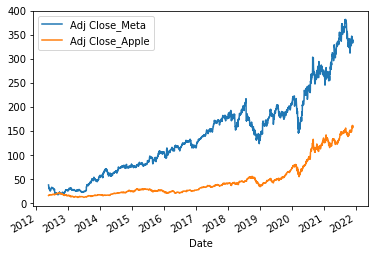

In [33]:
import matplotlib.pyplot as plt
meta_apple = meta_apple[["Adj Close_Meta", "Adj Close_Apple"]]
meta_apple.plot(grid = True)
plt.grid()
plt.show()

_______________________________________________________________________________________________________________________

Chiusura: Chiaramente le stesse librerie vengono utilizzate per tutte le aziende prese in considerazioni. Ciò che ho riportato sopra è un esempio di applicazione di utilizzo.

_______________________________________________________________________________________________________________________________

2. Statistiche Descrittive

_______________________________________________________________________________________________________________________________

In [84]:
import pandas as pd
import numpy as np
import yfinance as yf
#Tecnologia
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
meta_df = meta_df.groupby(pd.Grouper(freq='M')).mean()
meta_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-31,33.015556,33.868889,31.057778,31.870000,31.870000,1.390570e+08
2012-06-30,29.537143,30.232381,28.893333,29.540476,29.540476,3.180526e+07
2012-07-31,29.143333,29.598095,28.437619,28.880000,28.880000,2.477094e+07
2012-08-31,20.287391,20.644783,19.768696,20.108261,20.108261,5.008456e+07
2012-09-30,20.629474,21.089474,20.170526,20.627895,20.627895,5.571809e+07


_______________________________________________________________________________________________________________________________

a. Calcolare i rendimenti semplici e composti e visualizzarli in un grafico

_______________________________________________________________________________________________________________________________

Rendimenti Semplici

_______________________________________________________________________________________________________________________________

In [97]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
#Tecnologia
meta_month_returns = meta_df[['Adj Close']]
meta_month_returns = np.log(daily_returns/daily_returns.shift(1))
meta_month_returns = daily_log_returns.dropna()
meta_month_returns.head()

,Adj Close
Date,
2012-06-30,-0.075904
2012-07-31,-0.022612
2012-08-31,-0.362019
2012-09-30,0.025514
2012-10-31,-0.000406


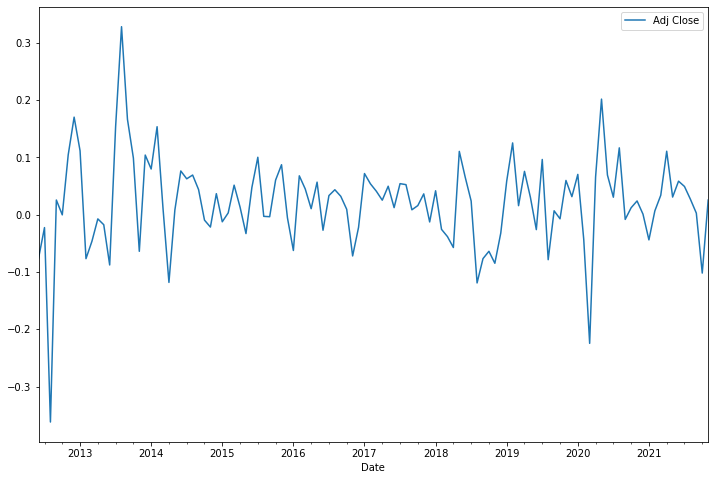

In [317]:
daily_log_returns.plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________________________________

Rendimenti Composti

_______________________________________________________________________________________________________________________________

In [101]:
cum_daily_return = (1 + meta_month_returns).cumprod()
cum_daily_return


,Adj Close
Date,
2012-06-30,0.924096
2012-07-31,0.903201
2012-08-31,0.576225
2012-09-30,0.590927
2012-10-31,0.590687
...,...
2021-07-31,7.487620
2021-08-31,7.689137
2021-09-30,7.709239


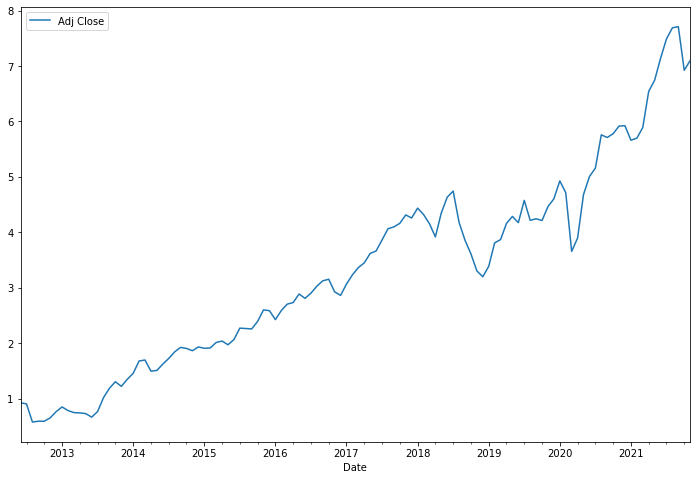

In [100]:
cum_daily_return.plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________________________________

In [ ]:
b. Commentare

_______________________________________________________________________________________________________________________________

In [212]:
#Tecnologia
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_meta_df = meta_df.join(apple_df, lsuffix='_Meta', rsuffix='_Apple')
apple_meta_df = apple_meta_df.groupby(pd.Grouper(freq='Y')).mean()
apple_meta_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Meta,High_Meta,Low_Meta,Close_Meta,Adj Close_Meta,Volume_Meta,Open_Apple,High_Apple,Low_Apple,Close_Apple,Adj Close_Apple,Volume_Apple
Date,,,,,,,,,,,,
2012-12-31,24.799613,25.300903,24.195871,24.673097,24.673097,5.464815e+07,21.524984,21.715758,21.271256,21.501701,18.503840,4.923590e+08
2013-12-31,35.476429,36.045040,34.930159,35.481151,35.481151,6.009199e+07,16.897433,17.058533,16.723111,16.879817,14.799177,4.064348e+08
2014-12-31,68.763968,69.639524,67.830199,68.762341,68.762341,4.753055e+07,23.054958,23.253166,22.868885,23.066164,20.711916,2.526109e+08
2015-12-31,88.749405,89.683373,87.762778,88.772857,88.772857,2.695888e+07,30.043938,30.311131,29.715774,30.010000,27.407819,2.073976e+08
2016-12-31,117.081071,118.091706,115.865873,117.035873,117.035873,2.547507e+07,26.126944,26.356796,25.922569,26.151002,24.378622,1.536901e+08


In [213]:
apple_meta_df = apple_meta_df[['Adj Close_Meta', 'Adj Close_Apple']]
apple_meta_df.head()

,Adj Close_Meta,Adj Close_Apple
Date,,
2012-12-31,24.673097,18.503840
2013-12-31,35.481151,14.799177
2014-12-31,68.762341,20.711916
2015-12-31,88.772857,27.407819
2016-12-31,117.035873,24.378622


In [214]:
apple_meta_returns = apple_meta_df.pct_change()
apple_meta_returns = apple_meta_returns.dropna()
apple_meta_returns.head(20)

,Adj Close_Meta,Adj Close_Apple
Date,,
2013-12-31,0.438050,-0.200211
2014-12-31,0.937996,0.399532
2015-12-31,0.291010,0.323288
2016-12-31,0.318375,-0.110523
2017-12-31,0.337848,0.466393
2018-12-31,0.095383,0.274878
2019-12-31,0.059043,0.118957
2020-12-31,0.291313,0.852308
2021-12-31,0.365256,0.453924


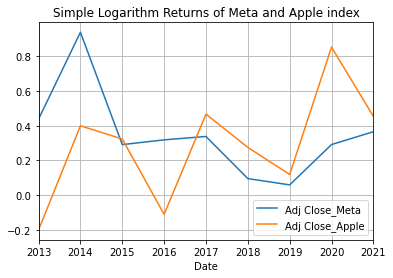

In [215]:
apple_meta_returns.plot(grid=True, title = 'Simple Logarithm Returns of Meta and Apple index yearly');

Apple:
Nel periodo 2015-2016 c'è stato un decremento di domanda da parte dell'Asia verso i prodotti Apple, questo spiega la consguente perdita con un ritorno semplice atteso che passò da positivo del 32% ad un negativo -11%.

(articolo di Fortune scritto nel 2016)
Gli analisti avevano ampiamente previsto un simile risultato, in parte perché le vendite di iPhone nei primi tre mesi del 2015 sono state artificialmente aumentate da gravi carenze di approvvigionamento che hanno ritardato le vendite dall'ultimo trimestre del 2014. 
Un altro fattore è stato il rafforzamento del dollaro USA dal 2015, che ha effettivamente ridotto il valore delle vendite di Apple all'estero di oltre 2 miliardi di dollari, ovvero circa 4%.
link articolo: https://fortune.com/2016/05/06/apple-shares-two-year-low/
link articolo: https://fortune.com/2016/04/26/apple-future-update-iphone/



Nel periodo 2019-2020 da 11% a 85%
La crescita esplosiva di AirPods, lo slancio promettente per l'Apple Watch e la promessa di un più grande salto tecnologico e delle funzionalità per la linea di iPhone nel 2020 hanno alimentato un grande anno per le azioni Apple.
Toni Sacconaghi, analista di Bernstein Research, stima che le vendite di AirPod siano state di circa 6 miliardi di dollari nel 2019 e siano quasi raddoppiate rispetto al 2018. L'analista di Bernstein prevede che le entrate di AirPod raggiungeranno i 15 miliardi di dollari nel 2020.
link articolo: https://www.fool.com/investing/2020/01/12/why-apple-stock-soared-862-in-2019.aspx




Facebook/Meta:

Nel periodo 2017-2019 il ritorno semplice atteso delle azioni di Facebook passarono da un 34% ad un 0.9% a fine 2019.
Dovuto ai seguenti eventi:

-Dichiarazione di Mark Zuckemberg:
Gli utenti spendono meno tempo sulla sua piattaforma.

-Cambridge Analitica: 
il più grande scandalo nella storia di facebook.
Un ricercatore esterno ha raccolto e poi venduto i dati personali di decine di milioni di utenti alla società di analisi che ha aiutato a eleggere il presidente di Donald Trump. 
La rivelazione ha dato il via a una serie di eventi, tra cui un'indagine formale della Federal Trade Commission sulle pratiche sulla privacy di Facebook che ha portato a una multa di 5 miliardi di dollari un anno dopo.

-Earning disaster:
La società ha mancato in modo insolito le stime sugli utili per le entrate e la crescita degli utenti, alimentando le preoccupazioni che i suoi scandali avessero finalmente colpito l'azienda. Facebook ha perso 121 miliardi di dollari di valore di mercato in seguito al rapporto.


immagine:
https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iQ2BOKamCy58/v2/pidjEfPlU1QWZop3vfGKsrX.ke8XuWirGYh1PKgEw44kE/-1x-1.png


correlazione tra Apple e Meta?

La correlazione statica di Apple e Meta è 0.081 che indica una correlazione positiva debole.
Creiamo un grafico di calore per vederlo visivamente

In [332]:
import seaborn as sns

data_df = yf.download('FB AAPL', start='2011-11-30', end='2021-11-30')
data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()
correlation = returns.corr()
correlation

[*********************100%***********************]  2 of 2 completed


,AAPL,FB
AAPL,1.000000,0.402076
FB,0.402076,1.000000


<AxesSubplot:>

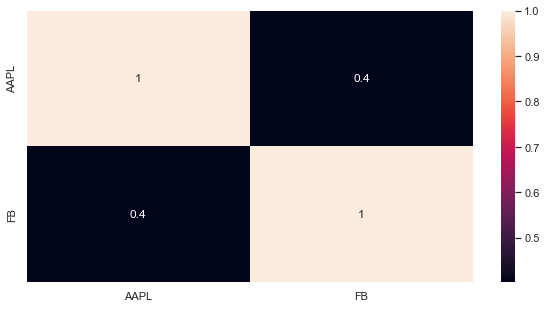

In [335]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation, annot=True)

Possiamo vedere come, seppure esiste una correlazione positiva tra apple e meta, quest'ultima sia molto debole.

_______________________________________________________________________________________________________________________________

In [ ]:
#Automobili
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_meta_df = meta_df.join(apple_df, lsuffix='_Meta', rsuffix='_Apple')
apple_meta_df = apple_meta_df.groupby(pd.Grouper(freq='Y')).mean()
apple_meta_df.head()